## Data Wrangling: Clean, Transform, Merge, Reshape 
##### - Much of the programming work in data analysis and modeling is spent in data preparation.
##### - That is, data loading, cleaning, transforming, and rearranging.
##### - This is discussed and demonstrated below.

In [1]:
# Importing the necessary libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5824\3092156988.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Performing DataFrame Merges

In [2]:
# Creating Pandas DataFrames 

df1 = pd.DataFrame(
    np.arange(12).reshape(4,3),
    index=list("abcd")
)

df2 = pd.DataFrame(
    np.arange(9).reshape(3,3),
    index=list("abc")
)

In [3]:
# In the below operating, the merging will take place on the overallaping column names 
# as the keys.
# It is, however, good practice to specify the column names where merging will take place

pd.merge(df1, df2)

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [4]:
data_1 = pd.DataFrame(
    {
        'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
        "data": range(7)
    }
)

data_2 = pd.DataFrame(
    {
        'key': ['a', 'b', 'd'],
        "data": range(3)
    }
)

data_2

,key,data
0,a,0
1,b,1
2,d,2


In [5]:
data_1

,key,data
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [6]:
pd.merge(data_1, data_2, on="key")

,key,data_x,data_y
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [7]:
# Creating a Population DataFrame 

df1 = pd.DataFrame({
    "Country": ["America", "Indonesia", "France"],
    "Location": ["New York", "Jakarta", "Paris"],
    "Population": [738100, 575030, 183305]
})

df2 = pd.DataFrame({
    "Country": ["America", "America", "Indonesia", "India", "France", "Greece"],
    "Location": ["New York", "Chicago", "Jakarta", "Mumbai", "Paris", "Yunani"],
    "Income": [1000, 1500, 1400, 1100, 900, 1200]
})

df1

,Country,Location,Population
0,America,New York,738100
1,Indonesia,Jakarta,575030
2,France,Paris,183305


In [8]:
df2

,Country,Location,Income
0,America,New York,1000
1,America,Chicago,1500
2,Indonesia,Jakarta,1400
3,India,Mumbai,1100
4,France,Paris,900
5,Greece,Yunani,1200


In [9]:
# Specifying the merge column as the key

pd.merge(df1, df2, on="Country")

,Country,Location_x,Population,Location_y,Income
0,America,New York,738100,New York,1000
1,America,New York,738100,Chicago,1500
2,Indonesia,Jakarta,575030,Jakarta,1400
3,France,Paris,183305,Paris,900


##### - In a case where the merge columns are different in each DataFrame, 
#####   you can specify them as parameters separately

In [10]:
# Specifying the merge columns seperately as paramters 

pd.merge(df1, df2, left_on="Country", right_on="Country")

,Country,Location_x,Population,Location_y,Income
0,America,New York,738100,New York,1000
1,America,New York,738100,Chicago,1500
2,Indonesia,Jakarta,575030,Jakarta,1400
3,France,Paris,183305,Paris,900


##### By default, merge will performs an "inner" join. 
##### However, you can specify the type of join that you want to achieve as with databases "outer", "inner", "left", or "right" joins.
##### - Check out the examples below 

In [11]:
# Performing a left join

pd.merge(df1, df2, right_on="Country", left_on="Country", how="left")

,Country,Location_x,Population,Location_y,Income
0,America,New York,738100,New York,1000
1,America,New York,738100,Chicago,1500
2,Indonesia,Jakarta,575030,Jakarta,1400
3,France,Paris,183305,Paris,900


In [12]:
# Performing a right join 

results = pd.merge(df1, df2, right_on="Country", left_on="Country", how="right")
results

,Country,Location_x,Population,Location_y,Income
0,America,New York,738100.0,New York,1000
1,America,New York,738100.0,Chicago,1500
2,Indonesia,Jakarta,575030.0,Jakarta,1400
3,India,NaN,NaN,Mumbai,1100
4,France,Paris,183305.0,Paris,900
5,Greece,NaN,NaN,Yunani,1200


### Understanding apply(), applymap(), and map()
___________
### 1). apply()
##### This method is defined for both pandas Series and DataFrame.
##### It allows us to apply functions and alter values along a specific axis. The default axis is columns.

In [70]:
# Importing the titanic dataset 

dataset = pd.read_csv("titanic.csv", index_col="PassengerId")
dataset.head(5)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# Applying a function that categorizes the passanges based on thier age.
# Then we create a new column for the same 

# Categorizes passengers according to thier age
def age_categorizer(age: int):
    if age < 18:
        return "Child"
    elif age >= 18 and age <= 35: 
        return "Youth"
    else:
        return "Senior Citizen"

# Creating a new col with age_category as a label
dataset["age_category"] = dataset.Age.apply(age_categorizer)
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Senior Citizen
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior Citizen
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Youth


### 2). map()
#### - This method is defined for Pandas Series objects. 
#### - It is used to substitute values in a Series object using a function, dictionary, or another Series object

In [72]:
# Using map() to map gender values to numerical values 
# that is, 0 for male and 1 for female 

def gender_mapping(gender: str): # The function for mapping gender
    return 0 if gender == "male" else 1

dataset["gender_map"] = dataset.Sex.map(gender_mapping)
dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Senior Citizen,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior Citizen,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Youth,1


In [73]:
# We can also use a dictionary to map gender values to numerical values 

mapping_dict = {
    "male": 0,
    "female": 1
}

dataset.Sex.map(mapping_dict)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    1
890    0
891    0
Name: Sex, Length: 891, dtype: int64

## Understanding Grouping and Sorting
##### - Grouping our data is very important as it allows us to perform some operations to these data 

In [74]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [75]:
# Grouping the data based on Sex and finding the mean

# The average age of a remale = 27.91 
# The average age of a male = 30.72

dataset.groupby("Sex").Age.mean()



Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [76]:
# Grouping the data based on age categorization, that is, Youth, Child, or Senior Citizen 
# Then getting the average age of each category 

# The average age of a Child is 9 yrs
# The average age of a Youth is 26 yrs 
# The average age of Senior Citizen is 46 yrs, haha.

dataset.groupby("age_category").Age.mean()


age_category
Child              9.041327
Senior Citizen    46.979263
Youth             26.013021
Name: Age, dtype: float64

In [20]:
# We can also county the number of passengers based on each category 
# For example, the number of males and females 

# There are 314 females 
# There are 577 males

dataset.groupby("Sex").Sex.value_counts()

Sex
female    314
male      577
Name: count, dtype: int64

In [77]:
# Getting the number of passangers based on age categorization 

# There are 113 Children 
# There are 384 Youths 
# There are 394 Senior Citizens

data= dataset.groupby("age_category")
data.Sex.value_counts()
data.Sex.count()

age_category
Child             113
Senior Citizen    394
Youth             384
Name: Sex, dtype: int64

#### To obtain a more fine-grained groups, you can use groupby() with more than one column
#### See examples below

In [78]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [23]:
# We want to know the number of people who bought the tickets, their class, and whether they survived.

data = dataset.groupby(["age_category", "Pclass"])
data["Survived"].value_counts()

age_category    Pclass  Survived
Child           1       1            11
                        0             1
                2       1            21
                        0             2
                3       0            49
                        1            29
Senior Citizen  1       1            72
                        0            62
                2       0            38
                        1            23
                3       0           159
                        1            40
Youth           1       1            53
                        0            17
                2       0            57
                        1            43
                3       0           164
                        1            50
Name: count, dtype: int64

In [24]:
# Get the number of people who bought the tickets, thier gender and whwether they survived.

data = dataset.groupby(["Sex", "Pclass"])
data["Survived"].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: count, dtype: int64

### Using another dataset to understand groupby() better

In [25]:
# Creating a simple DataFrame 

tech_langs   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000],
    'Duration':['30days','50days','55days','40days','60days','35days','55days','50days'],
    'Discount':[1000,2300,1000,1200,2500,1300,1400,1600]
})

data = pd.DataFrame(tech_langs, columns=['Courses','Fee','Duration','Discount'])
data

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000
1,PySpark,25000,50days,2300
2,Hadoop,23000,55days,1000
3,Python,24000,40days,1200
4,Pandas,26000,60days,2500
5,Hadoop,25000,35days,1300
6,Spark,25000,55days,1400
7,Python,22000,50days,1600


##### - Group the data based on the Courses column and then use sum() to get the sum for all numerical columns in the DataFrame 
##### - The group key is used as the index of the resulting DataFrame by default. 
##### - To turn this off, you can use "as_index=False" param



In [26]:
# grouping the data and getting the sum of all numerical columns in the DataFrame
data.groupby("Courses").sum() 

,Fee,Duration,Discount
Courses,,,
Hadoop,48000,55days35days,2300
Pandas,26000,60days,2500
PySpark,25000,50days,2300
Python,46000,40days50days,2800
Spark,47000,30days55days,2400


In [27]:
# Turning off the default index 
data.groupby("Courses", as_index=False).sum()

,Courses,Fee,Duration,Discount
0,Hadoop,48000,55days35days,2300
1,Pandas,26000,60days,2500
2,PySpark,25000,50days,2300
3,Python,46000,40days50days,2800
4,Spark,47000,30days55days,2400


#### * Rather than performing a sum on all numerical values in the DataFrame, we can explicitly specify the column to which we want to perform the sum 

In [28]:
# Specifying the column to perform the sum on 
# In this case, we get the total fees for each course

data.groupby("Courses")["Fee"].sum()

Courses
Hadoop     48000
Pandas     26000
PySpark    25000
Python     46000
Spark      47000
Name: Fee, dtype: int64

#### * We can also group the data using more than one column. We just need to send a list of columns.
#### * Then we can calculate the sum.

In [29]:
# Using multiple columns to group the data 

data.groupby(["Courses", "Duration"])["Fee"].sum()

Courses  Duration
Hadoop   35days      25000
         55days      23000
Pandas   60days      26000
PySpark  50days      25000
Python   40days      24000
         50days      22000
Spark    30days      22000
         55days      25000
Name: Fee, dtype: int64

#### * We can still use the groupby() to get sum() and count() at the same time 

In [30]:
# Applying more than one function to the groupby()

data.groupby("Courses")["Fee"].agg(["sum", "count"])

,sum,count
Courses,,
Hadoop,48000,2
Pandas,26000,1
PySpark,25000,1
Python,46000,2
Spark,47000,2


In [31]:
data.groupby("Courses").agg({"Fee": ["sum", "count"]})

Fee      
           sum count
Courses             
Hadoop   48000     2
Pandas   26000     1
PySpark  25000     1
Python   46000     2
Spark    47000     2

## Sorting 
#### * By default, pandas will sort the results in ascending order based on the groupby() keys. 
#### * This can however be turned off as illustrated below

In [32]:
data.head(5)

,Courses,Fee,Duration,Discount
0,Spark,22000,30days,1000
1,PySpark,25000,50days,2300
2,Hadoop,23000,55days,1000
3,Python,24000,40days,1200
4,Pandas,26000,60days,2500


In [33]:
# Turning off default sorting 

unsorted_df = data.groupby("Courses", sort=False).sum()
unsorted_df


,Fee,Duration,Discount
Courses,,,
Spark,47000,30days55days,2400
PySpark,25000,50days,2300
Hadoop,48000,55days35days,2300
Python,46000,40days50days,2800
Pandas,26000,60days,2500


####

In [34]:
# The result can then be sorted later on need bases 

sorted_df = unsorted_df.sort_values("Courses")
sorted_df

,Fee,Duration,Discount
Courses,,,
Hadoop,48000,55days35days,2300
Pandas,26000,60days,2500
PySpark,25000,50days,2300
Python,46000,40days50days,2800
Spark,47000,30days55days,2400


### Working with Missing Data 
#### - Missing datapoints are represented with a NaN ('Not a Number') whose dtype is "float64"
#### - Pandas provides specific methods for working with NaN.
#### - They are; 
##### 1. isnull() 
##### 2. notnull()

In [35]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [36]:
# Selecting the NaN records based on "Cabin" col

dataset[pd.isnull(dataset.Cabin)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Senior Citizen,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Youth,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Senior Citizen,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Youth,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Senior Citizen,1


In [37]:
# Selecting the NaN records based on "Age" col 

dataset[pd.isnull(dataset.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Senior Citizen,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Senior Citizen,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Senior Citizen,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Senior Citizen,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Senior Citizen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Senior Citizen,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Senior Citizen,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Senior Citizen,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Senior Citizen,0


** All the above records have missing values on the Age col

## Replacing the missing values 
##### -- A common operation in data cleaning is to know how to deal with the NaN or mission values.
##### -- Pandas provides methods for replacing NaN with something else thru' fillna()

In [38]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [39]:
# For example; We can replace the Passangers without Cabin Number with "Unknown"

dataset["Cabin"] = dataset.Cabin.fillna("Unknown")
dataset.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Youth,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Unknown,Q,Senior Citizen,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Senior Citizen,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,Child,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,Youth,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,Child,1


In [40]:
# We can also apply fillna to multiple cols 
dataset["Cabin"] = dataset.Cabin.replace("Unknown", np.nan)

# If you want to fillna using the same value 
dataset["Age", "Cabin"] = dataset[["Age", "Cabin"]].fillna("0")

# If you want to fillna specific values for each col
dataset = dataset.fillna(value={"Age": dataset.Age.mean(), "Cabin": "Unknown"})
dataset.head()


ValueError: Cannot set a DataFrame with multiple columns to the single column ('Age', 'Cabin')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


<Axes: xlabel='Age', ylabel='Fare'>

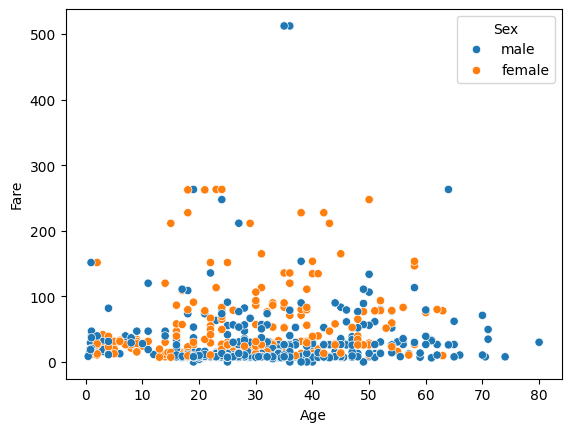

In [52]:
sns.scatterplot(data=dataset, y="Fare", x="Age", hue="Sex")

<Axes: xlabel='Sex', ylabel='Fare'>

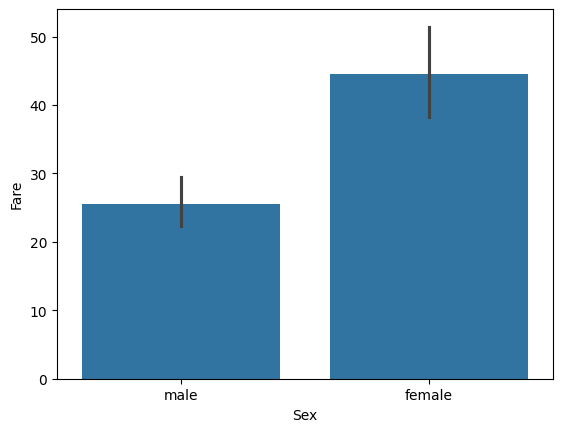

In [53]:
sns.barplot(data=dataset, x="Sex", y="Fare")

In [54]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [55]:
dataset.groupby("Sex")["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [60]:
dataset.groupby("Pclass")["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

In [61]:
dataset.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [63]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0


In [65]:
# Looking at the average fare paid by each passenger for each agen_category
dataset.groupby("age_category").Fare.mean()

age_category
Child             31.220798
Senior Citizen    34.169712
Youth             30.476908
Name: Fare, dtype: float64

<Axes: xlabel='age_category', ylabel='Fare'>

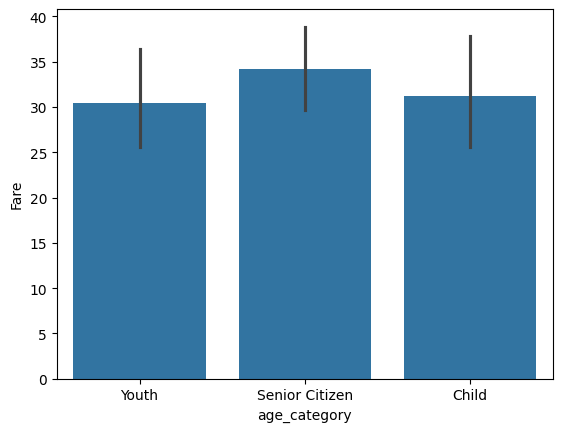

In [68]:
# Senior Citizens paid a higher fare
# We can try to plot the same using a barplot 
sns.barplot( x=dataset.age_category, y=dataset.Fare)

In [79]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,gender_map
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Citizen,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,0
